In [1]:
import matplotlib.pyplot as plt
import csv
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
def do_plot(ticks, ticks_labels, values, labels, title, ylabel, output_file_name, plot_colors, xlim_left=0, xlim_right=2016):

    for i in range(len(values)):
        values[i].plot(label=labels[i], color=plot_colors[i])
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xticks(ticks, ticks_labels)
    plt.xlim(left=xlim_left, right=xlim_right)
    plt.legend()
    plt.grid(True)
    plt.savefig(output_file_name+".png", orientation='landscape')
    plt.figure(dpi=80)
    plt.show()

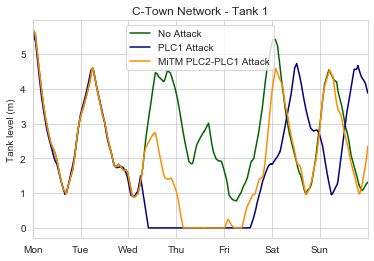

<Figure size 480x320 with 0 Axes>

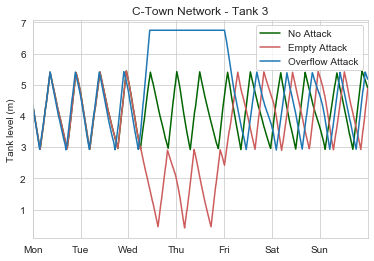

<Figure size 480x320 with 0 Axes>

In [6]:
ctown_week_0 = pd.read_csv('normal_behaviour/week_0/physical_process.csv')
ctown_plc1_attack = pd.read_csv('tank_1_empty_1_pu1_pu2_off/week_0/physical_process.csv')
ctown_mitm_tank_1_attack = pd.read_csv('tank_1_empty_2_pu1_pu2_off/week_0/physical_process.csv')

ctown_week_19 = pd.read_csv('normal_behaviour/week_19/physical_process.csv')
ctown_mitm_tank_3_empty = pd.read_csv('tank_3_empty_offset/week_19/physical_process.csv')
ctown_mitm_tank_3_overflow = pd.read_csv('tank_3_overflow_offset/week_19/physical_process.csv')

# sns.set_theme()
sns.set_style("whitegrid")

days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
x_values = np.arange(0, 2016, step=288)
attack_1_plot_colors = ["darkgreen", "navy", "darkorange"]

attack_tank_1 = [ctown_week_0["T1_LEVEL"], ctown_plc1_attack["T1_LEVEL"], ctown_mitm_tank_1_attack["T1_LEVEL"] ]
attack_tank_1_labels = ["No Attack", "PLC1 Attack", "MiTM PLC2-PLC1 Attack"]

# First type of attack. Different cyber-physical vector, same physical output
do_plot(x_values, days, attack_tank_1, attack_tank_1_labels, "C-Town Network - Tank 1", "Tank level (m)", "ctown_tank_1", attack_1_plot_colors)

attack_tank_3 = [ctown_week_19["T3_LEVEL"], ctown_mitm_tank_3_empty["T3_LEVEL"], ctown_mitm_tank_3_overflow["T3_LEVEL"]]
attack_tank_3_labels = ["No Attack", "Empty Attack", "Overflow Attack"]

# Second type of attack. Same cyber-physical vector, different physical output
attack_2_plot_colors = ["darkgreen", "indianred", "tab:blue"]
do_plot(x_values, days, attack_tank_3, attack_tank_3_labels, "C-Town Network - Tank 3", "Tank level (m)", "ctown_tank_3", attack_2_plot_colors )